In [212]:
print(5+3)

8


In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [214]:
df=pd.read_csv(r"C:\Users\MASUM\Machine Learning\Diabates\diabetes.csv")

In [215]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [216]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [217]:
import seaborn as sns

<Axes: xlabel='Pregnancies', ylabel='count'>

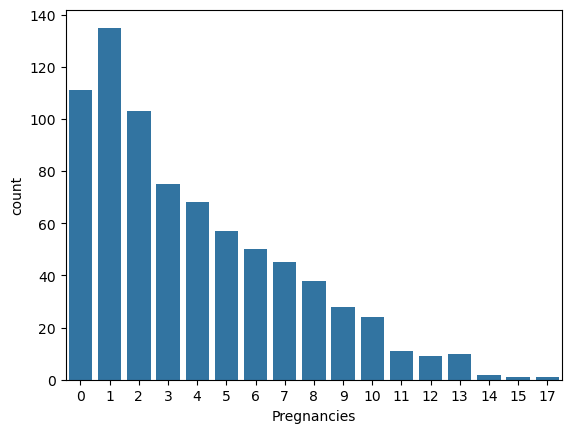

In [218]:
sns.countplot(x='Pregnancies',data=df)

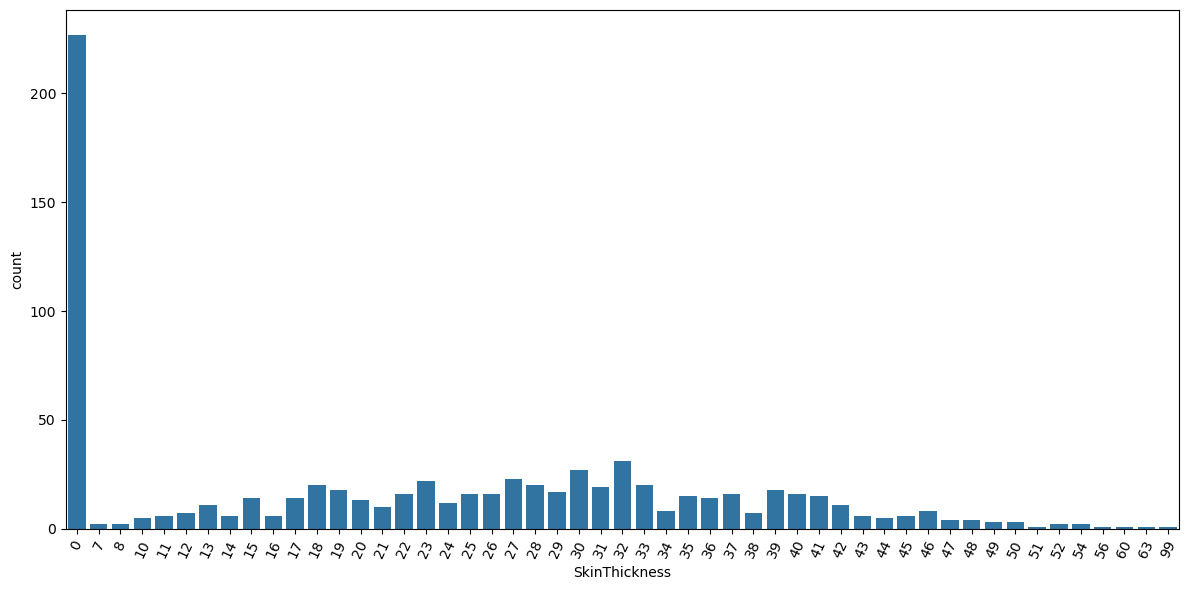

In [219]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='SkinThickness',data=df)
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

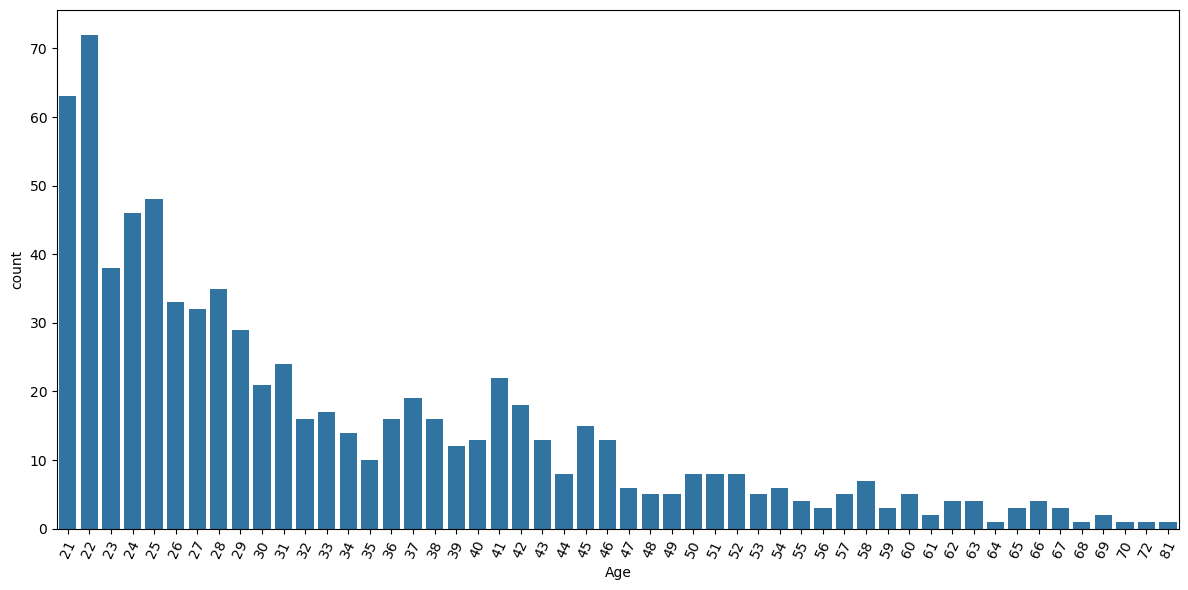

In [220]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='Age',data=df)

plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

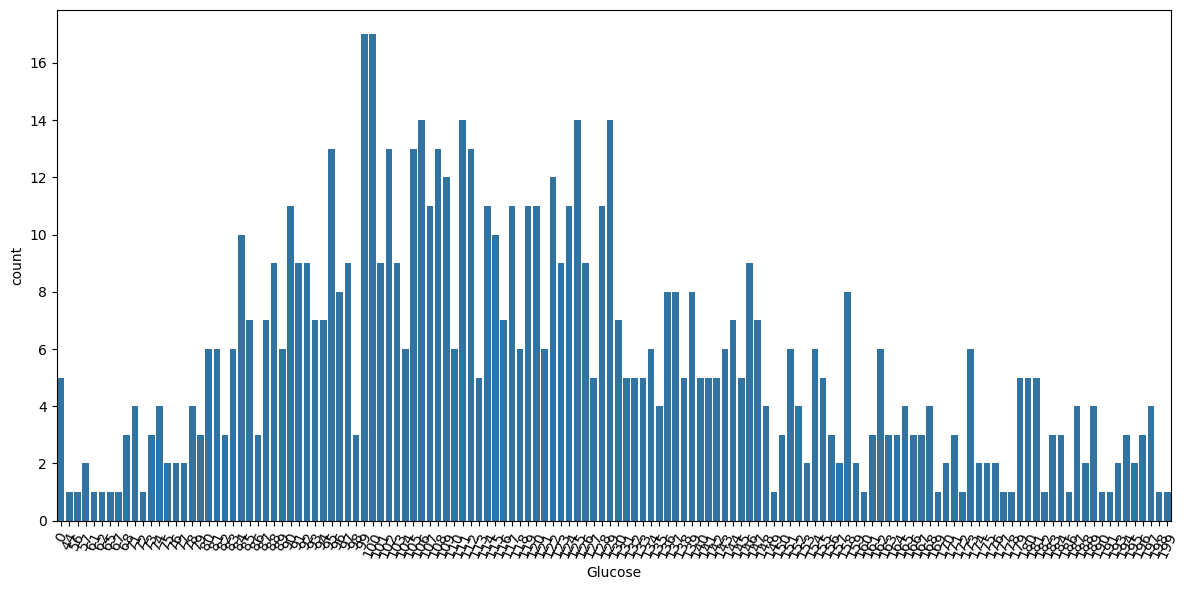

In [221]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='Glucose',data=df)

plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

<Axes: xlabel='BloodPressure', ylabel='count'>

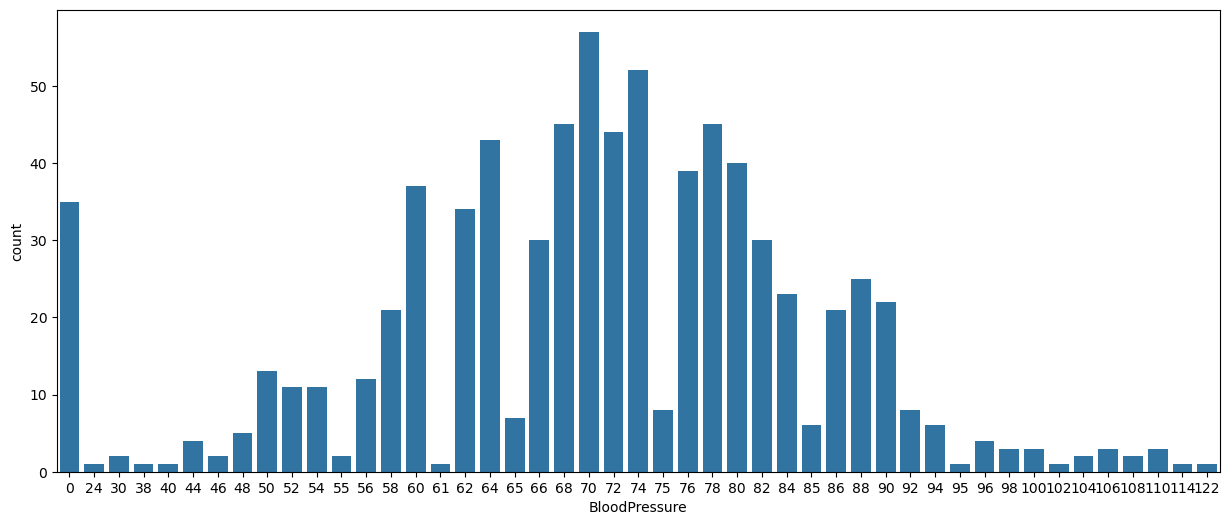

In [222]:

plt.figure(figsize=(15, 6)) 
sns.countplot(x='BloodPressure',data=df)

<Axes: >

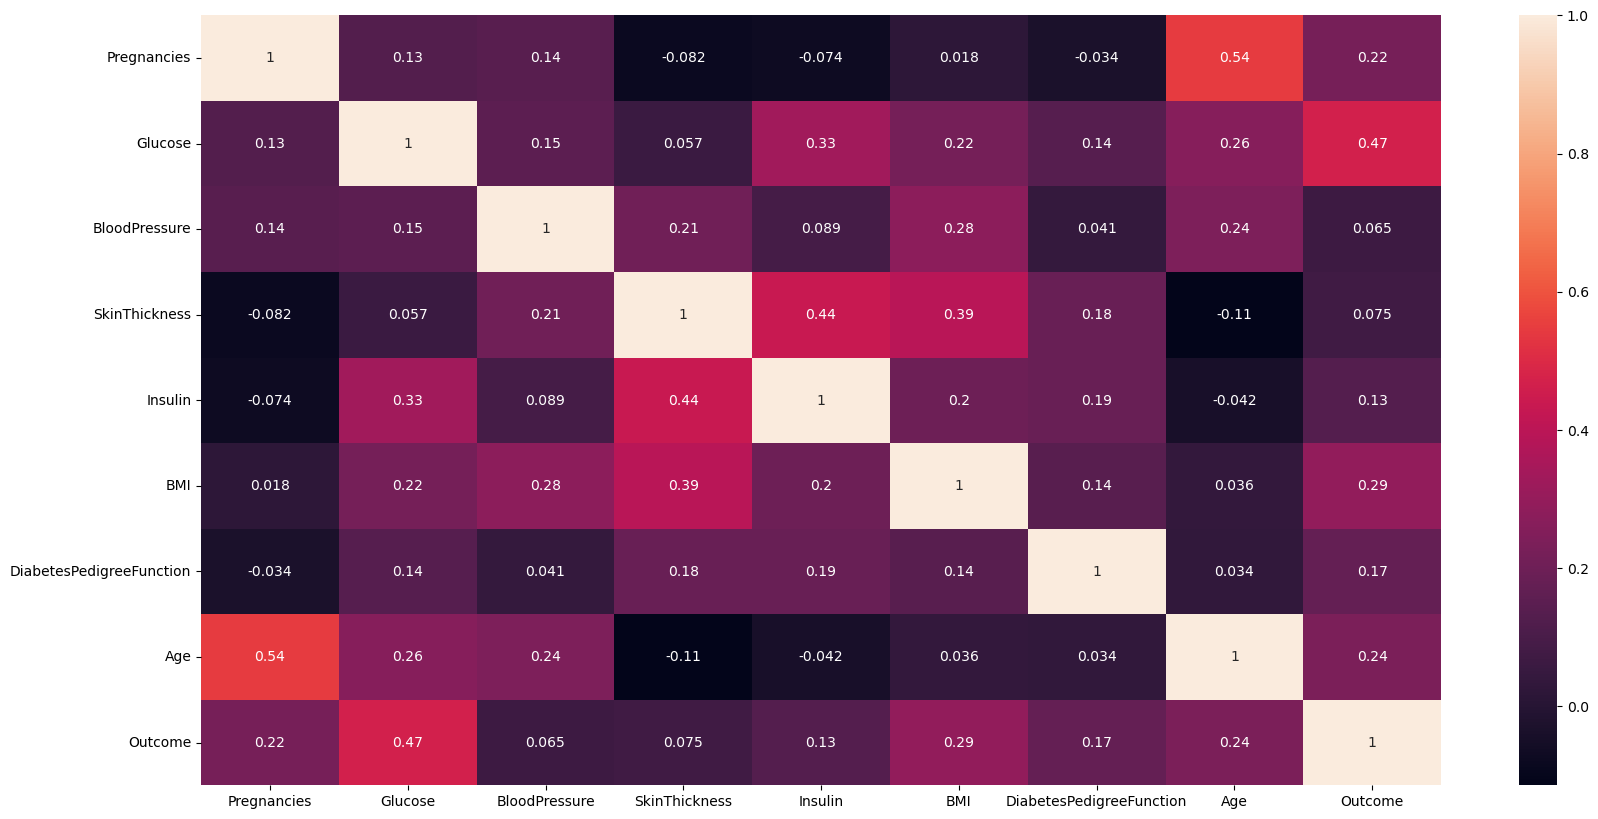

In [223]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [224]:
# then we check the result
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [225]:
from sklearn.utils import resample

In [226]:
df_majority = df[(df['Outcome']==0)]
df_minority = df[(df['Outcome']==1)]

In [227]:
df_minority_upsample = resample(df_minority, replace=True, n_samples=450, random_state=0)
df_upsampled = pd.concat([df_majority, df_minority_upsample])

Outcome
0    500
1    450
Name: count, dtype: int64

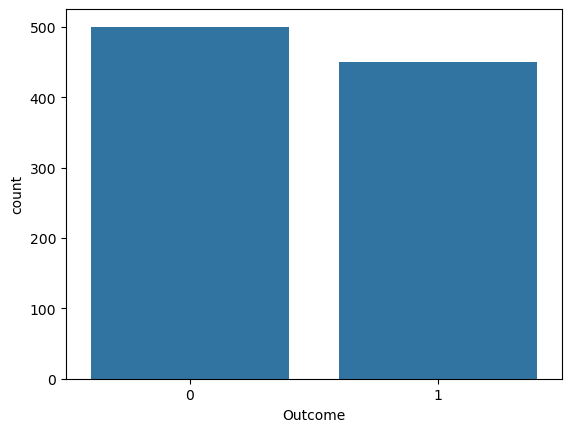

In [228]:
sns.countplot(data=df_upsampled, x=df_upsampled['Outcome'])
df_upsampled['Outcome'].value_counts()

In [229]:
df_upsampled['Outcome']

1      0
3      0
5      0
7      0
10     0
      ..
197    1
579    1
349    1
128    1
523    1
Name: Outcome, Length: 950, dtype: int64

In [230]:
import scipy.stats as stats

z = np.abs(stats.zscore(df_upsampled))
df_clean = df_upsampled[(z < 3).all(axis=1)]
print("Before clean: ", df_upsampled.shape)
print("After clean: ", df_clean.shape)

Before clean:  (950, 9)
After clean:  (844, 9)


In [231]:
X = df_clean.drop('Outcome', axis=1)
y = df_clean.Outcome

In [232]:
from sklearn.model_selection import train_test_split, cross_val_score

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [234]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
10,4,110,92,0,0,37.6,0.191,30
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
199,4,148,60,27,318,30.9,0.150,29
213,0,140,65,26,130,42.6,0.431,24
197,3,107,62,13,48,22.9,0.678,23
128,1,117,88,24,145,34.5,0.403,40


In [235]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
198,4,109,64,44,99,34.8,0.905,26
344,8,95,72,0,0,36.8,0.485,57
5,5,116,74,0,0,25.6,0.201,30
199,4,148,60,27,318,30.9,0.150,29
646,1,167,74,17,144,23.4,0.447,33
...,...,...,...,...,...,...,...,...
402,5,136,84,41,88,35.0,0.286,35
343,5,122,86,0,0,34.7,0.290,33
569,0,121,66,30,165,34.3,0.203,33
243,6,119,50,22,176,27.1,1.318,33


In [236]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
10,4,110,92,0,0,37.6,0.191,30,0
18,1,103,30,38,83,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...,...
199,4,148,60,27,318,30.9,0.150,29,1
213,0,140,65,26,130,42.6,0.431,24,1
197,3,107,62,13,48,22.9,0.678,23,1
128,1,117,88,24,145,34.5,0.403,40,1


In [237]:
from sklearn.tree import DecisionTreeClassifier


In [238]:
dt=DecisionTreeClassifier()

In [239]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [240]:
dt.score(X_test,y_test)

0.8047337278106509

In [241]:
!pip install xgboost

In [242]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [243]:
nb=GaussianNB()

In [244]:
nb.fit(X_train,y_train)

GaussianNB()

In [245]:
nb.score(X_test,y_test)

0.6686390532544378

In [246]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.8816568047337278

In [247]:
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)
GB.score(X_test,y_test)

0.8047337278106509

In [248]:
KN=KNeighborsClassifier()
KN.fit(X_train,y_train)
KN.score(X_test,y_test)

0.6923076923076923

In [249]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

C:\Users\MASUM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7159763313609467

In [250]:
sv=SVC()
sv.fit(X_train,y_train)
sv.score(X_test,y_test)

0.6804733727810651

In [251]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.8757396449704142

<BarContainer object of 8 artists>

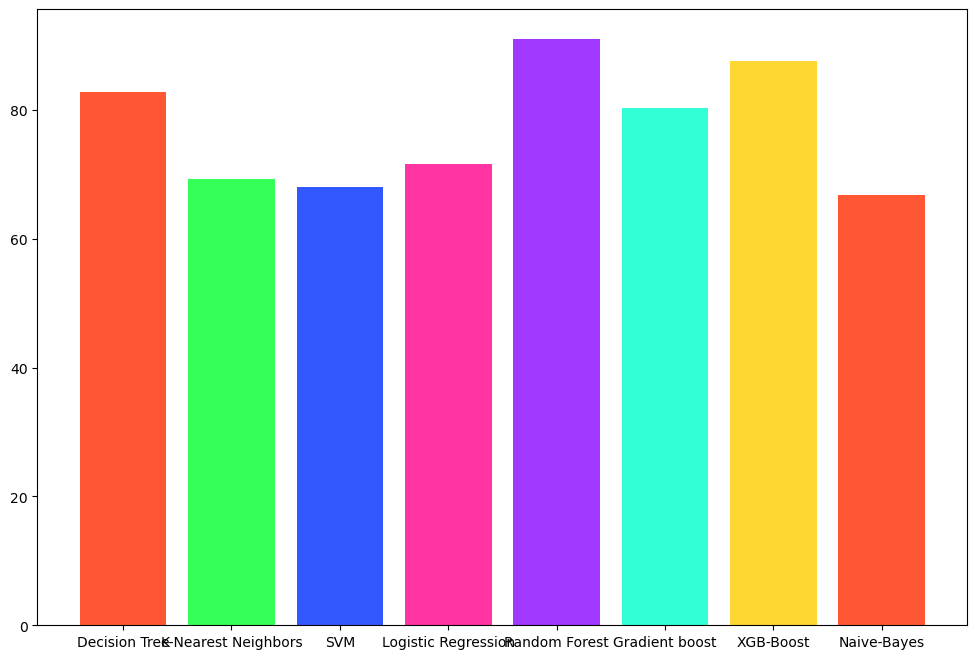

In [252]:
models = ['Decision Tree', 'K-Nearest Neighbors','SVM','Logistic Regression','Random Forest','Gradient boost','XGB-Boost','Naive-Bayes']
scores = [0.828*100, 0.6923*100,0.6804*100,0.71597*100,0.911*100,0.804*100,0.8757*100,0.668*100]
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A138FF', '#33FFD7', '#FFD733']
plt.figure(figsize=(12, 8))
plt.bar(models, scores,color=colors)